In [8]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [9]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [12]:
y_train.shape

(50000, 1)

In [13]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [14]:
y_train.reshape(-1,)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [15]:
classes=['airoplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [16]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

TypeError: only integer scalar arrays can be converted to a scalar index

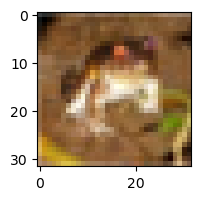

In [56]:
plot_sample(x_train,y_train,0)

In [18]:
x_train=x_train/255
x_test=x_test/255

In [19]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
           )

In [20]:
ann.fit(x_train,y_train,epochs=2)

Epoch 1/2
1563/1563 [==============================] - 128s 81ms/step - loss: 1.8135 - accuracy: 0.3517
Epoch 2/2
1563/1563 [==============================] - 123s 78ms/step - loss: 1.6225 - accuracy: 0.4273


In [21]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 7s 21ms/step - loss: 1.5756 - accuracy: 0.4493


[1.5756256580352783, 0.44929999113082886]

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [39]:
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print('classification report',classification_report(y_test,y_pred_classes))

313/313 [==============================] - 7s 22ms/step
classification report               precision    recall  f1-score   support

           0       0.45      0.63      0.52      1000
           1       0.43      0.71      0.53      1000
           2       0.44      0.09      0.15      1000
           3       0.37      0.23      0.28      1000
           4       0.35      0.51      0.41      1000
           5       0.39      0.35      0.37      1000
           6       0.53      0.46      0.50      1000
           7       0.43      0.60      0.50      1000
           8       0.65      0.51      0.57      1000
           9       0.58      0.41      0.48      1000

    accuracy                           0.45     10000
   macro avg       0.46      0.45      0.43     10000
weighted avg       0.46      0.45      0.43     10000



In [42]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #dense
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9674 - accuracy: 0.6633
Epoch 2/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8842 - accuracy: 0.6916
Epoch 3/5
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8194 - accuracy: 0.7163
Epoch 4/5
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7606 - accuracy: 0.7352
Epoch 5/5
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7147 - accuracy: 0.7516


In [48]:
cnn.evaluate(x_test,y_test)

TypeError: in user code:

    File "C:\Users\saurabh\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\saurabh\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\saurabh\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\saurabh\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1853, in test_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\saurabh\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1179, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\saurabh\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\saurabh\anaconda3\Lib\site-packages\keras\src\utils\metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\saurabh\anaconda3\Lib\site-packages\keras\src\metrics\base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "C:\Users\saurabh\anaconda3\Lib\site-packages\keras\src\metrics\base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\saurabh\anaconda3\Lib\site-packages\keras\src\metrics\accuracy_metrics.py", line 462, in sparse_categorical_accuracy
        if matches.shape.ndims > 1 and matches.shape[-1] == 1:

    TypeError: '>' not supported between instances of 'NoneType' and 'int'


In [49]:
y_test=y_test.reshape(-1,)
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

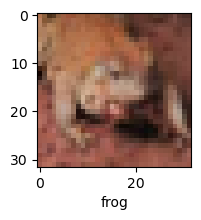

In [60]:
plot_sample(x_test,y_test,5)

In [55]:
y_pred=cnn.predict(x_test)
y_pred[:5]
np.argmax(y_pred[0])

313/313 [==============================] - 3s 11ms/step


3

In [59]:
y_pred=cnn.predict(x_test)
y_pred[:5]
np.argmax(y_pred[5])

313/313 [==============================] - 3s 11ms/step


6